__Universidade Federal do Pará  
  Disciplina: Tópicos Especiais em Inteligência Artificial  
  Docente: Claudomiro Sales  
  Discente: Hiago Cavalcante Prata  
  Matrícula: 201406840049__

---

### Atividade 02: Título

[1. Introdução](#1.-Introdução)  
[2. Testes](#2.-Testes)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Cenário 1](#2.1.-Cenário-1)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Cenário 2](#2.2.-Cenário-2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Cenário 3](#2.3.-Cenário-3)  
[3. Baseline](#3.-Baseline)  
[4. Hipóteses](#4.-Hipóteses)  
[5. Resultados](#5.-Resultados)  
[6. Considerações Finais](#6.-Considerações-Finais)  

---

## 1. Introdução

Algumas classes de problemas não chegam a ser suficientemente complexas para que um algoritmo específico seja desenvolvido para solucioná-lo. Para isso, existem métodos heurísticos que podem ser aplicados na resolução de tal problema. E alguns desses métodos são baseados no comportamento de processos estocásticos (_Randomwalk_), onde não se faz necessário a utilização de mecanismos de controle complexos para que se alcance a solução.

Tendo isso em vista, um método heurístico foi criado para tentar resolver o problema proposto.

Abaixo segue a implementação:

In [8]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as pl

def target(wsize, alphabet):
    return np.random.choice(alphabet, wsize)

def round_up(num):
    return (10 - num % 10) + num

class Chromosome:

    genes = []
    fitness = 0

    def __init__(self, size, alphabet):
        np.random.seed()
        self.genes = np.random.choice(alphabet, size) 

    def __str__(self):
        return "".join(list(map(str, self.genes)))

    def _fitness(self, target):
        hits = 0
        for i, j in zip(self.genes, target):
            if i == j:
                hits += 1
        self.fitness = (hits*100)/len(target)

class Population:

    def __init__(self, psize, csize, alphabet):
        self.alphabet = alphabet
        self.psize = psize
        self.csize = csize
        self.population = self._gen_pop(psize, csize, alphabet)
        
    def __str__(self):
        return "\n".join(map(str,self.population))

    def sort(self):
        self.population = sorted(self.population, key=lambda chromosome: chromosome.fitness)

    def renew(self):
        index = int(len(self.population)/2)
        self.population = self._gen_pop(index, self.csize, self.alphabet) \
        + self.population[index:]
    
    def _gen_pop(self, psize, csize, alphabet):
        pop = []
        for _ in range(psize):
            pop.append(Chromosome(csize, self.alphabet))
        return pop

class Randomwalk(Population):
    
    def __init__(self, psize, alphabet, target, gcounter, tcounter = 5):
        self.alphabet = alphabet
        self.target = target
        self.psize = psize
        self.csize = len(self.target)
        self.gcounter = gcounter
        self.tcounter = tcounter 

    def update(self, target):
        for i in range(len(self.population)):
            self.population[i]._fitness(self.target)    

    def get_fitness(self):
        return [self.population[i].fitness for i in range(len(self.population))]

    def run(self, verbose=False):
       
        self.best_scores = []
        
        if verbose:
            print("{!s} started...".format(type(self).__name__))
            print("Target: {!s}".format("".join(list(map(str, self.target)))))
            print("Population size: {!s}".format(self.psize))
            print("Total executions: {!s}".format(self.tcounter))
            print("Max generations without change: {!s}\n".format(self.gcounter))
        
        for i in range(self.tcounter):
            
            self.population = self._gen_pop(self.psize, self.csize, self.alphabet)
            self.update(self.target)
            
            self.scores = []
            
            j = 0
            k = 1
            
            if verbose:
                print("Execution {!s} started...\n".format(i+1))
            
            while self.scores.count(j) < self.gcounter:
                
                self.sort()
                self.renew()
                self.update(self.target)
                self.sort()
                
                j = self.get_fitness()[-1]
                self.scores.append(j)
                                
                if verbose:
                    print("\tGeneration {!s}".format(k))
                    print("\tBest individual: {!s}".format(self.population[-1]))
                    print("\tBest score: {!s}%\n".format(j))
                
                if j == 100:
                    
                    if verbose:
                        print("\tTarget found!\n")
                        
                    break
                                        
                k += 1
                           
            self.best_scores.append(self.scores)
            
            if verbose:
                print("Execution {0!s} ended in {1!s} generations".format(i+1, k-1))
                print("Target: {!s}".format("".join(list(map(str, self.target)))))
                print("Result: {!s}".format(self.population[-1]))
                print("Best score: {!s}%\n".format(self.scores[-1]))
        
        
        lexec = round_up(max([len(bscore) for bscore in self.best_scores]))
        
        for bscore in self.best_scores:
            bscore.extend([bscore[-1]]*(lexec-len(bscore)))
            
        self.m   = np.mean(self.best_scores, axis=0) 
        self.std = np.std(self.best_scores, axis=0)
        self.idx = np.arange(1, lexec+1)
        
        if verbose:
            print("Mean score per generation:")
            print(*self.m)
            print()
            print("Standard deviantion per generation:")
            print(*self.std)
            print()
            print("{!s} ended.".format(type(self).__name__))
       
            
    def plot(self):
        
        pl.figure(figsize=(15, 10))
        pl.title(u"Média de Acertos por Geração")
        pl.xlabel(u"Gerações")
        pl.ylabel(u"Acertos (%)")
        pl.grid(alpha=0.3)
        pl.errorbar(self.idx, self.m, self.std, ls=None, color='black', ecolor='b', alpha=0.5)
        pl.show()

---

## 2. Testes  



Para se obter informações de onde possamos tirar conclusões sobre o algoritmo apresentado, se faz necessária a realização de alguns testes, utilizando algumas variáveis como parâmetros. Nesse caso, temos temos 4 variáveis: tamanho da população (`psize`), tamanho da palavra alvo (`wsize`), número de testes (`tcounter`) e o número de gerações (`gcounter`).

Os testes a seguir foram organizado em cenários que destacam apenas uma das quatro variáveis por vez, mantendo as restantes em estado constante. No entanto, para o escopo deste estudo, apenas duas dessas variáveis são alteradas, `psize` e `wsize`. As variáveis se alternam como na tabela abaixo:

| psize 	| wsize 	| gcounter 	| tcounter 	|
|:-----:	|:-----:	|:--------:	|:--------:	|
| 20 	| 20 	| 1000 	| 10 	|
| 100 	| 20 	| 1000 	| 10 	|
| 500 	| 20 	| 1000 	| 10 	|
| 1000 	| 20 	| 1000 	| 10 	|
| 20 	| 30 	| 1000 	| 10 	|
| 100 	| 30 	| 1000 	| 10 	|
| 500 	| 30 	| 1000 	| 10 	|
| 1000 	| 30 	| 1000 	| 10 	|
| 20 	| 40 	| 1000 	| 10 	|
| 100 	| 40 	| 1000 	| 10 	|
| 500 	| 40 	| 1000 	| 10 	|
| 1000 	| 40 	| 1000 	| 10 	|

As quatro primeiras linhas da tabela são referentes aos cenários utilizados para o primeiro teste. As quatro linhas seguintes foram utilizadas para o segunto teste. As outras quatro linhas são usadas para o último teste.

In [9]:
t1 = target(20, [0, 1])
t2 = target(30, [0, 1])
t3 = target(40, [0, 1])

psize1  = 20
psize2  = 100
psize3  = 500
psize4  = 1000

gcount = 100

### 2.1. Cenário 1


Para este cenário, a palavra alvo é gerada aleatóriamente pela função `target()`, com um tamanho fixo de 20 bits.

In [10]:
print("Palavra alvo: ", t1)

Palavra alvo:  [0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1]


In [11]:
r11 = Randomwalk(psize=psize1, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)
r12 = Randomwalk(psize=psize2, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)
r13 = Randomwalk(psize=psize3, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)
r14 = Randomwalk(psize=psize4, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)

#### População: 20 indivíduos | Palavra alvo: 20 genes

In [12]:
r11.run()

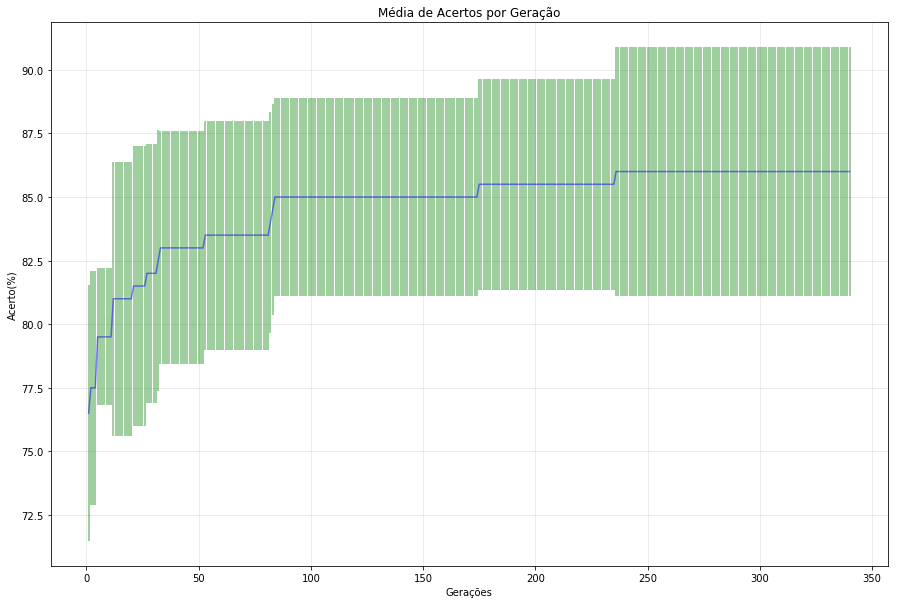

In [13]:
r11.plot()

#### População: 100 indivíduos | Palavra alvo: 20 genes

In [14]:
r12.run()

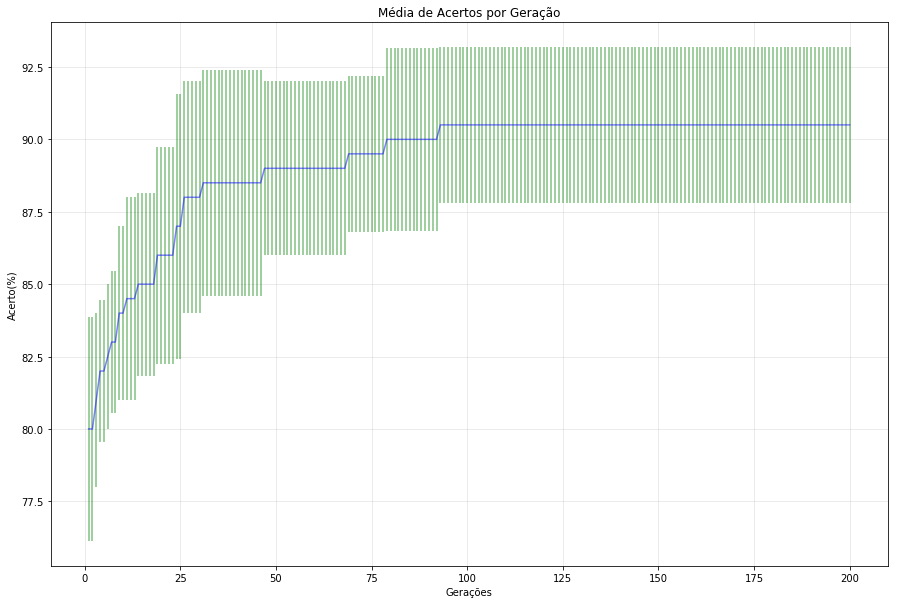

In [15]:
r12.plot()

#### População: 500 indivíduos | Palavra alvo: 20 genes

In [16]:
r13.run()

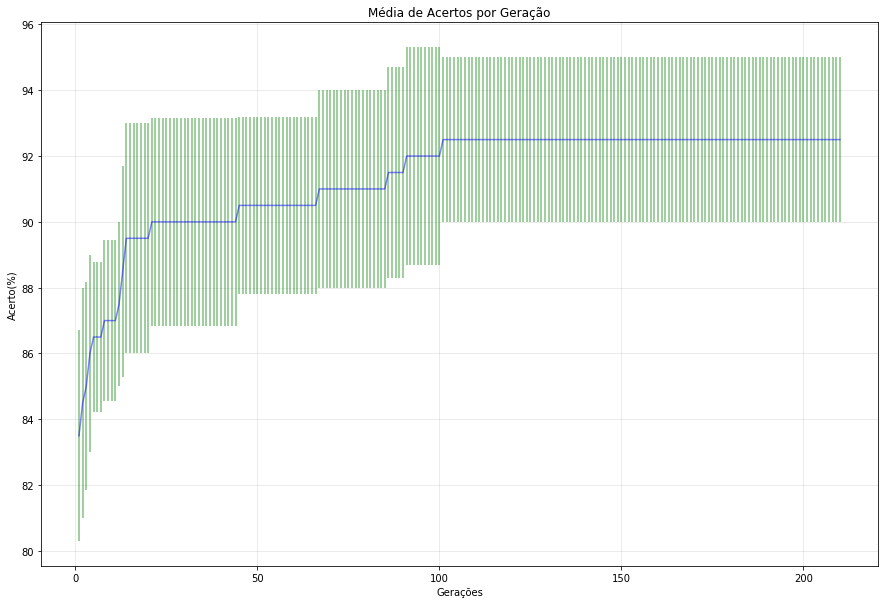

In [17]:
r13.plot()

In [45]:
print(len(r13.idx), len(r13.m), len(r13.std))

210 210 210


#### População: 1000 indivíduos | Palavra alvo: 20 genes

In [18]:
r14.run()

	Target found!



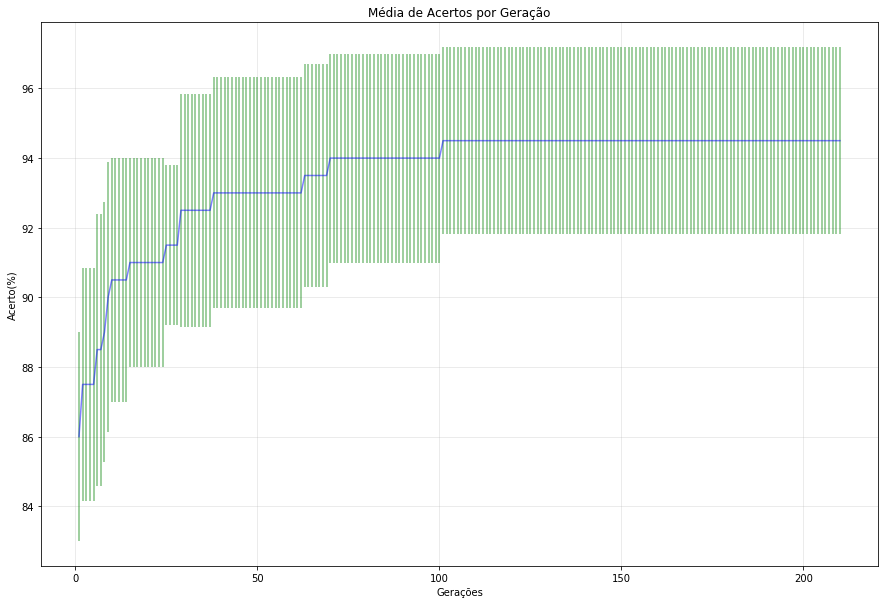

In [19]:
r14.plot()

---

### 2.2. Cenário 2

Para este cenário, a palavra alvo é gerada aleatóriamente pela função `target()`, com um tamanho fixo de 30 bits.

In [20]:
print("Palavra alvo: ", t2)

Palavra alvo:  [1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1]


In [21]:
r21 = Randomwalk(psize=psize1, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)
r22 = Randomwalk(psize=psize2, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)
r23 = Randomwalk(psize=psize3, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)
r24 = Randomwalk(psize=psize4, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)

#### População: 20 indivíduos | Palavra alvo: 30 genes

In [22]:
r21.run()

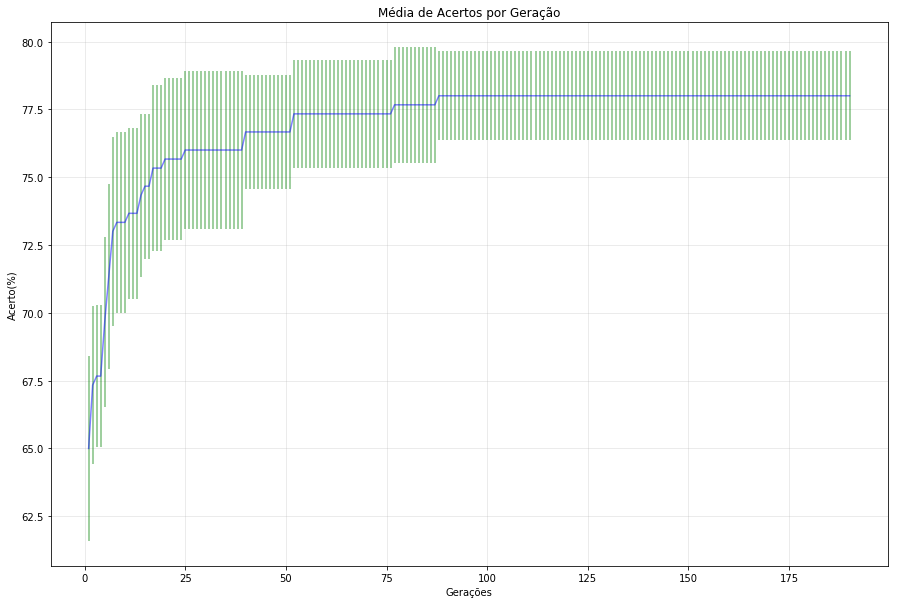

In [23]:
r21.plot()

#### População: 100 indivíduos | Palavra alvo: 30 genes

In [24]:
r22.run()

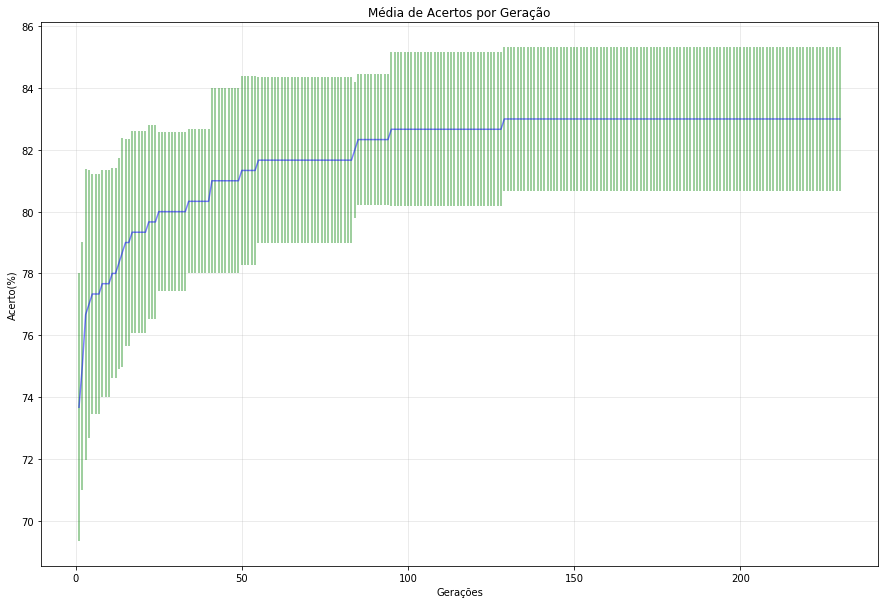

In [25]:
r22.plot()

#### População: 500 indivíduos | Palavra alvo: 30 genes

In [26]:
r23.run()

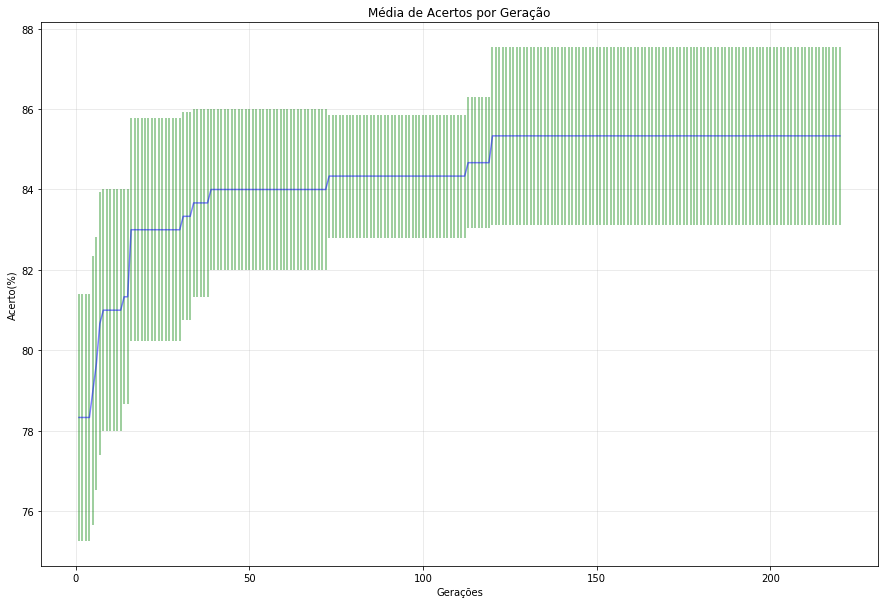

In [27]:
r23.plot()

#### População: 1000 indivíduos | Palavra alvo: 30 genes

In [28]:
r24.run()

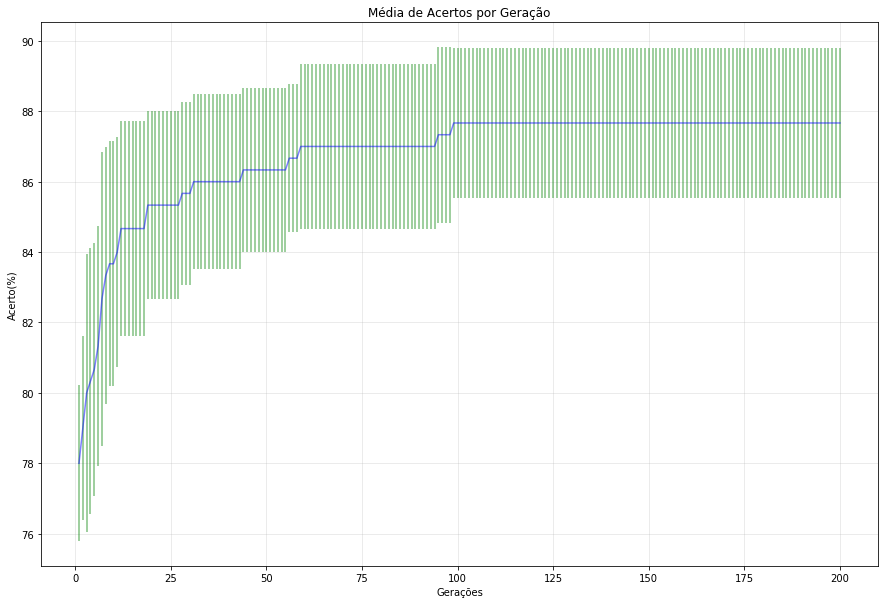

In [29]:
r24.plot()

---

### 2.3. Cenário 3

Para este cenário, a palavra alvo é gerada aleatóriamente pela função `target()`, com um tamanho fixo de 40 bits.

In [30]:
print("Palavra alvo: ", t3)

Palavra alvo:  [0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1
 1 0 0]


In [31]:
r31 = Randomwalk(psize=psize1, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)
r32 = Randomwalk(psize=psize2, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)
r33 = Randomwalk(psize=psize3, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)
r34 = Randomwalk(psize=psize4, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)

#### População: 20 indivíduos | Palavra alvo: 40 genes

In [32]:
r31.run()

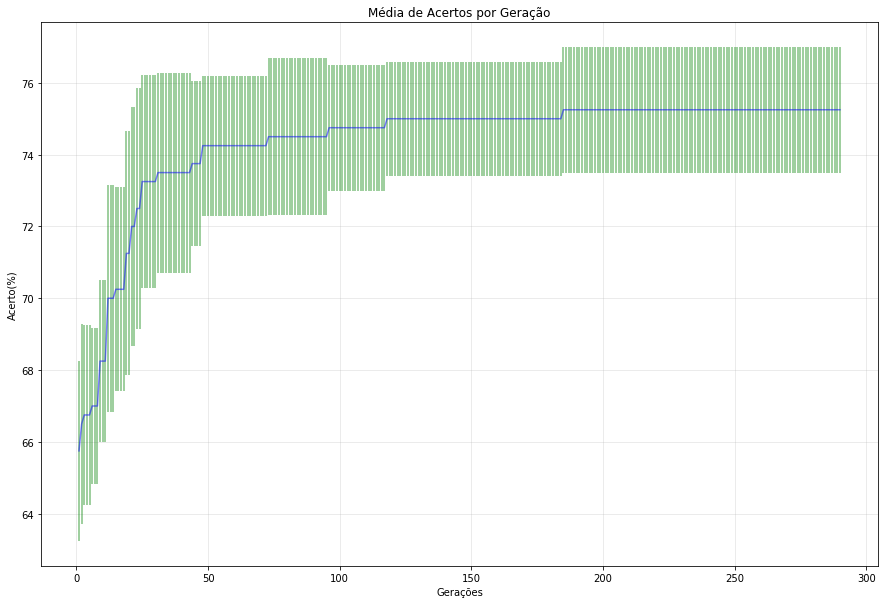

In [33]:
r31.plot()

#### População: 100 indivíduos | Palavra alvo: 40 genes

In [34]:
r32.run()

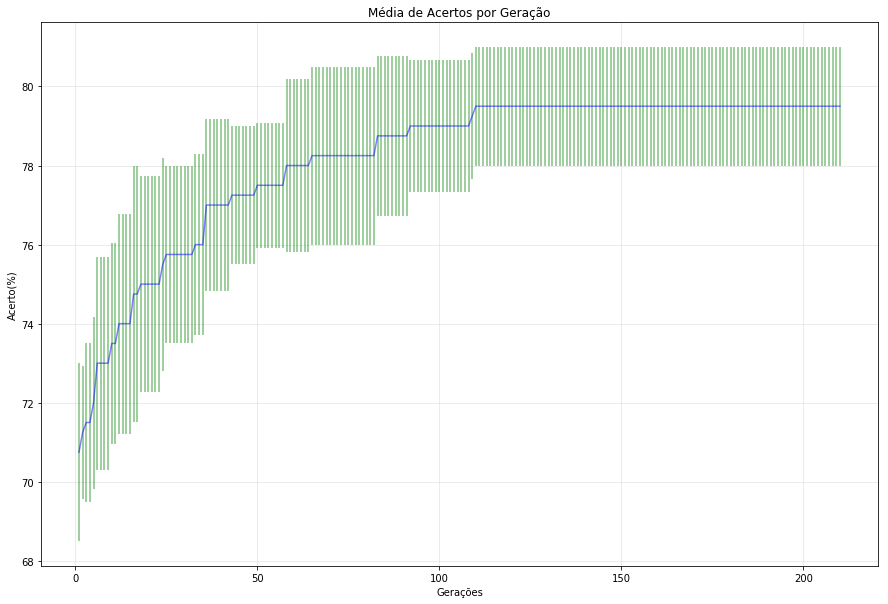

In [35]:
r32.plot()

#### População: 500 indivíduos | Palavra alvo: 40 genes

In [36]:
r33.run()

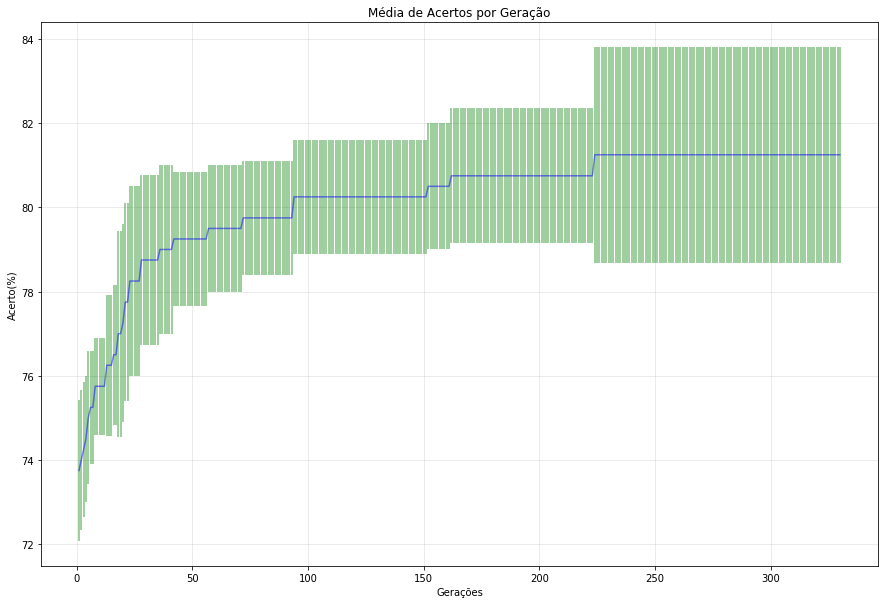

In [37]:
r33.plot()

#### População: 1000 indivíduos | Palavra alvo: 40 genes

In [38]:
r34.run()

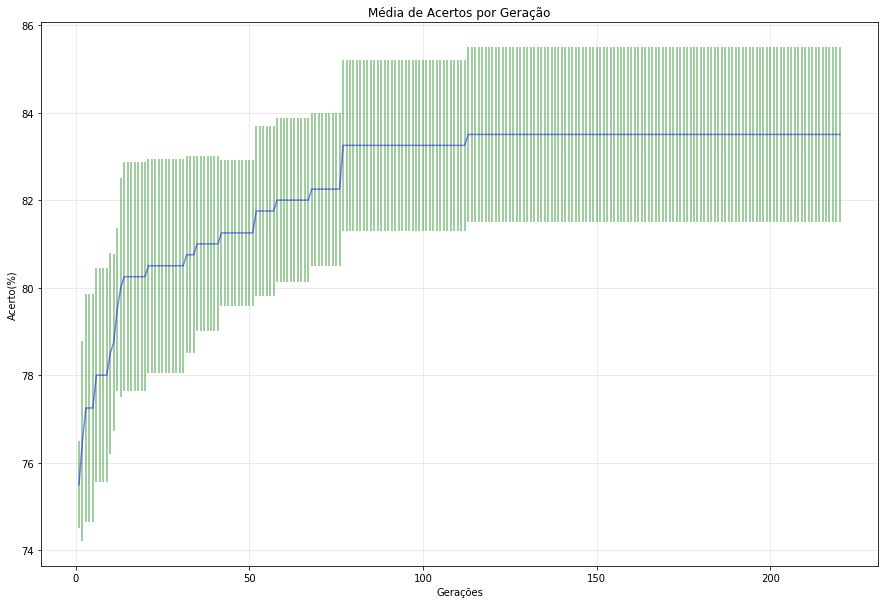

In [39]:
r34.plot()

---

## 3. Baseline  



Como _baseline_, foram selecionados os testes cujos resultados encontraram, ou que tenham se aproximado mais da palavra alvo. Para tanto, não bastou que o resultado fosse alcançado um certo número de vezes. Todas as _baselines_ selecionadas também levam em consideração a precisão desses resultados. Então, os melhores resultados foram aqueles em que o algoritmo convergiu, ou seja, deixou de variar a sua acurácia; e que se aproximou do resultado, ou o tenha encontrado.  

Os gráficos abaixo exibem esses resultados, um para cada cenário:

#### População: 1000 indivíduos | Palavra alvo: 20 genes

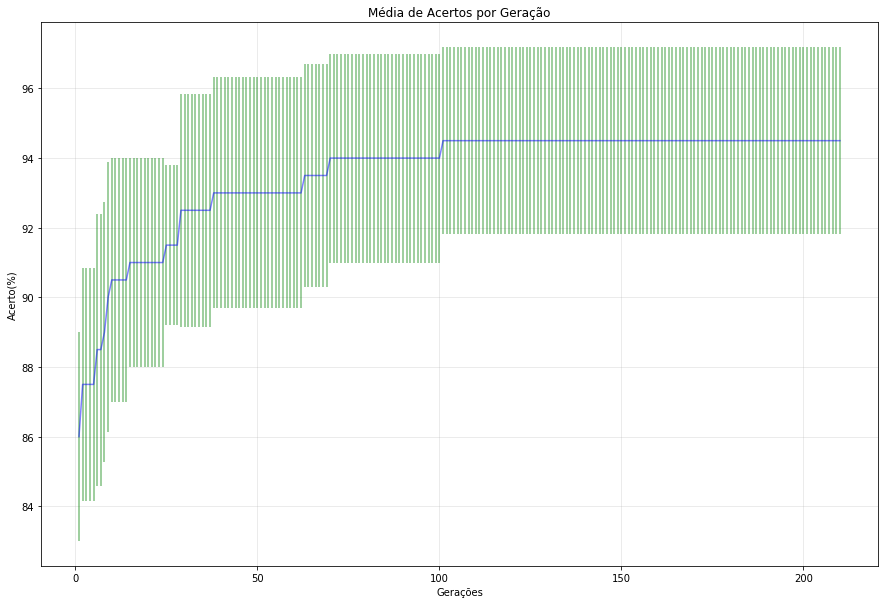

In [40]:
r14.plot()

#### População: 100 indivíduos | Palavra alvo: 30 genes

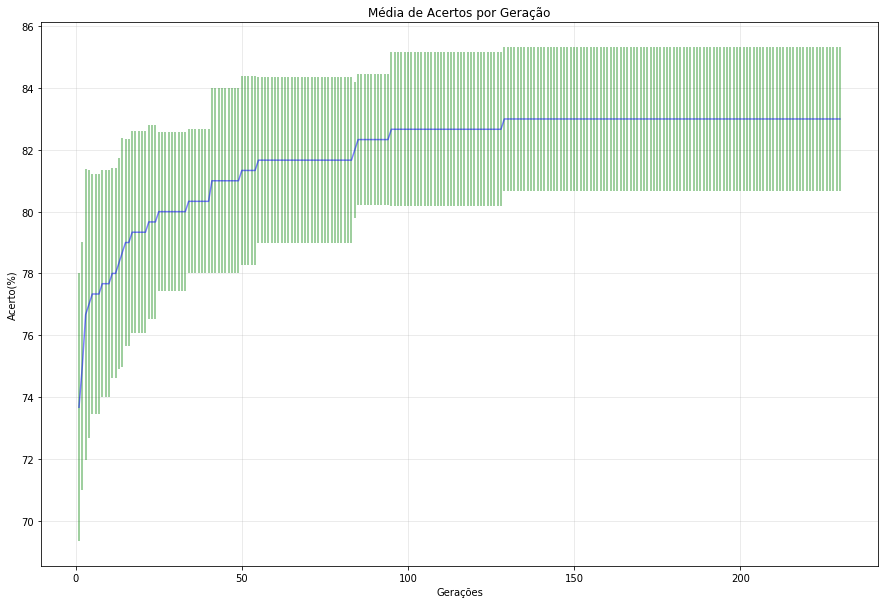

In [41]:
r22.plot()

#### População: 1000 indivíduos | Palavra alvo: 40 genes

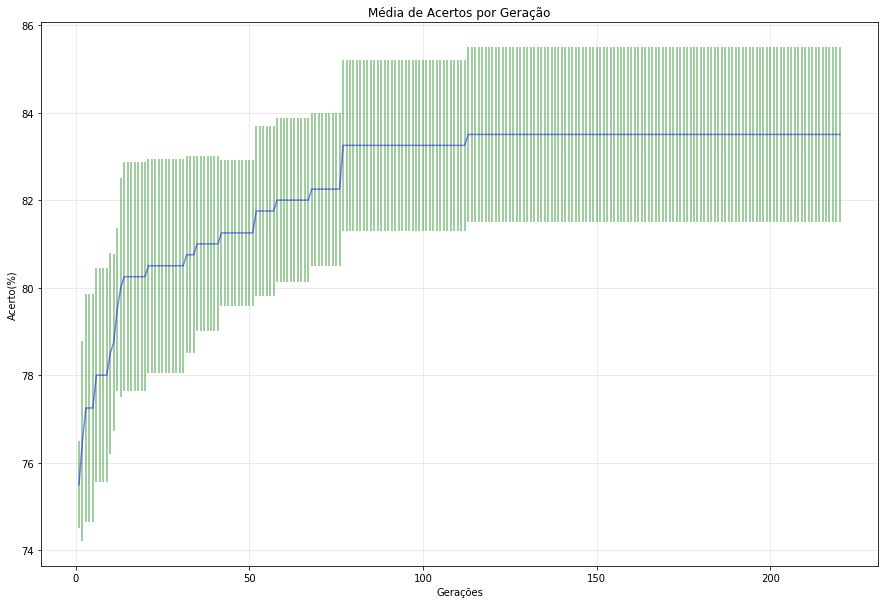

In [42]:
r34.plot()

---

## 4. Hipóteses  


Com base nos experimentos realizados anteriormente, podemos levantar hipóteses a respeito da eficácia do método heurístico aplicado:

1. Por se tratar de um método de caráter puramente randômico, não é possível afirmar que a solução para o problema será encontrada, independente do número de gerações empregadas, ou da quantidade de indivíduos contidos na população;
2. Não há parâmetro que consiga aproximar mais os resultados obtidos dos esperados;
3. A ausência de operadores que permitam que as informações do melhor indivíduo sejam passadas para outros indivíduos da população, faz com que não haja possibilidade de melhora nos resultados.

---

## 5. Resultados  


Partindo dos resultados obtidos, fazemos considerações a respeito das hipóteses geradas anteriormente.

O gráfico abaixo mostra o comparativo dos melhores resultados obtidos em cada cenário; e foi obtido plotando as médias dos melhores resultados de cada teste.



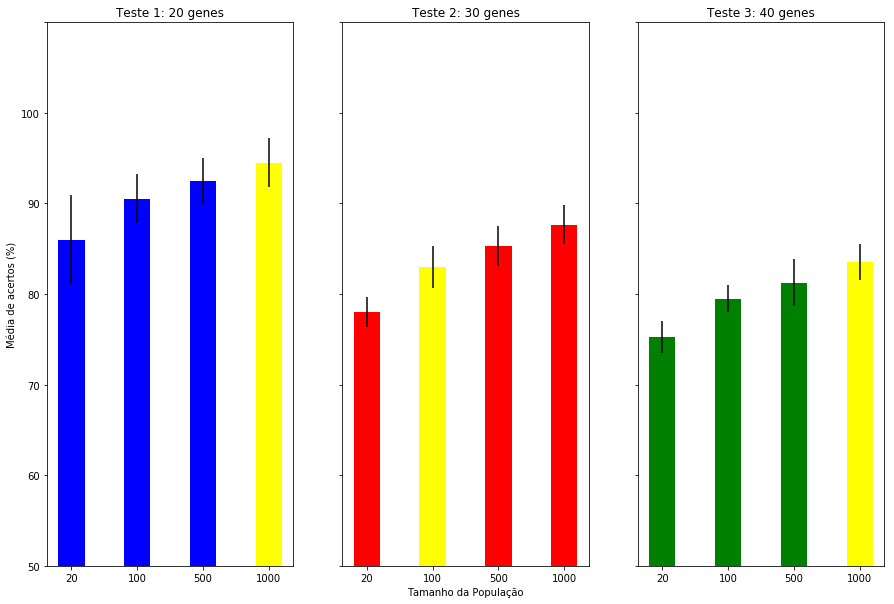

In [43]:
lb = ["20", "100", "500", "1000"]
index  = np.arange(1, 5, 1)

a1 = [ [ a[-1] for a in r11.best_scores ],
       [ a[-1] for a in r12.best_scores ],
       [ a[-1] for a in r13.best_scores ],
       [ a[-1] for a in r14.best_scores ] ]

a2 = [ [ a[-1] for a in r21.best_scores ],
       [ a[-1] for a in r22.best_scores ],
       [ a[-1] for a in r23.best_scores ],
       [ a[-1] for a in r24.best_scores ] ]

a3 = [ [ a[-1] for a in r31.best_scores ],
       [ a[-1] for a in r32.best_scores ],
       [ a[-1] for a in r33.best_scores ],
       [ a[-1] for a in r34.best_scores ] ]

m1 = np.mean(a1, axis=1)
std1 = np.std(a1, axis=1)

m2 = np.mean(a2, axis=1)
std2 = np.std(a2, axis=1)

m3 = np.mean(a3, axis=1)
std3 = np.std(a3, axis=1)

fig = pl.figure(figsize=(15, 10)) 
ax1 = pl.subplot(1, 3, 1)
ax2 = pl.subplot(1, 3, 2, sharey=ax1)
ax3 = pl.subplot(1, 3, 3, sharey=ax1)

c1 = ['blue', 'blue', 'blue', 'yellow']
ax1.bar(index, m1, yerr=std1, width=0.4, color=c1)
ax1.set_xticks(index)
ax1.set_xticklabels(labels=lb)
ax1.set_title(u"Teste 1: 20 genes")
ax1.set_ylabel(u"Média de acertos (%)")
pl.ylim(50, 110, 5)
pl.setp(ax1.get_yticklabels()[-1], visible=False)

c2 = ['red', 'yellow', 'red', 'red']
ax2.bar(index, m2, yerr=std2, width=0.4, color=c2)
ax2.set_xticks(index)
ax2.set_xticklabels(labels=lb)
ax2.set_title(u"Teste 2: 30 genes")
ax2.set_xlabel(u"Tamanho da População")
pl.setp(ax2.get_yticklabels(), visible=False)

c3 = ['green', 'green', 'green', 'yellow']
ax3.bar(index, m3, yerr=std3, width=0.4, color=c3)
ax3.set_xticks(index)
ax3.set_xticklabels(labels=lb)
ax3.set_title(u"Teste 3: 40 genes")
pl.setp(ax3.get_yticklabels(), visible=False)


pl.show()

Avaliando as informações exibidas neste _plot_, pode-se afirmar que realmente não há parâmetros que consigam aproximar o resultado obtido do esperado, visto que em cada cenário, independente dos parâmetros usados e gerações utilizadas para atingir ou não o resultado, o comportamento do algoritmo não segue uma regra, o tamanho da população não garante que o resultado será encontrado em todos os casos. 

Vide os testes com o maior população (1000 indivíduos) para os três casos: no primeiro, o algoritmo converge e encontra a solução; no segundo, além de não convergir, também não encontra o melhor resultado; e no terceiro, ele converge, mas não encontra o melhor resultado. As convergência também ocorre em momentos diferentes, independente do tamanho da população. O que indica, que mesmo a capacidade de varrer um maior espaço de busca, não é um fator decisiva para se alcançar os resultados. 

A ausência de mecanismos que possibilitem que os indivíduos troquem informações entre si também é um fator importante a ser considerado neste estudo. Há casos em que um resultado aproximado é rapidamente encontrado, e um mecanismo desse tipo possibilitaria que informações fossem compartilhadas entre os melhores indivíduos, a fim de que a combinação das informações possuídas por cada um pudesse gerar um melhor resultado.

---

## 6. Considerações Finais



Este trabalho possibilitou o maior entendimento a cerca da empregabilidade de métodos heurísticos na solução de problemas, dando margem à análise crítica a respeito de como esta classe de algoritmos podem ser utilizados, e como os parâmetros configurados podem, ou não, influenciar nos resultados obtidos.